# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\varepsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Esercizio 04.1 - Soluzione proposta

Per svolgere l'esercizio in esame, si è aggiunto un elemento al _walker_ presente nel codice _MD_MC_, al fine di immagazzinarvi le pressioni calcolate. Nella funzione _Measure_, ispirandosi al calcolo dell'energia potenziale, si è calcolata la somma presente nella formula di $P$; tale somma è stata in seguito moltiplicata per $\displaystyle{\frac{1}{V}}$. Per ottenere la stima di $P$ si è infine sommato il termine $\rho k_B T$. 

Si nota che tutti i calcoli sono stati effettuati in unità ridotte, per cui $ k_B = \varepsilon = \sigma = 1$.

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

### Esercizio 04.2 - Soluzione proposta

Per tutte le fasi del sistema si sono effettuate $M=100000$ simulazioni di dinamica molecolare, da cui si sono ricavate le medie a blocchi per $100$ blocchi da $1000$ elementi ciascuno. 

#### Solido

Preliminarmente alla simulazione _MD_, si è studiata la termalizzazione del sistema.

Si ricorda che, nello studio della dinamica molecolare, il numero di particelle $N$, il volume del sistema $V$ e l'energia totale $E$ sono conservati.

Eseguendo $M=2000$ simulazioni, suddivise in altrettanti blocchi da un solo elemento, si è osservato che la temperatura del sistema non rimane costante al valore iniziale assegnato, ma descresce rapidamente. Tale decrescita è dovuta al fatto che, data la configurazione cristallina iniziale, il solido evolve verso una configurazione a energia potenziale più alta e di conseguenza, per mantenere $E$ costante, l'energia cinetica (e dunque $T$) deve abbassarsi.

Si nota che la temperatura si stabilizza intorno alla $500$-esima iterazione: una volta raggiunta tale situazione di equilibrio, si è iniziata la simulazione effettiva. 

Eseguendo più volte la termalizzazione si è ricavato che la temperatura da cui conviene partire per stabilizzarsi intorno a quella desiderata (ossia $T^* = 0.8$) è $T = 1.54$. 

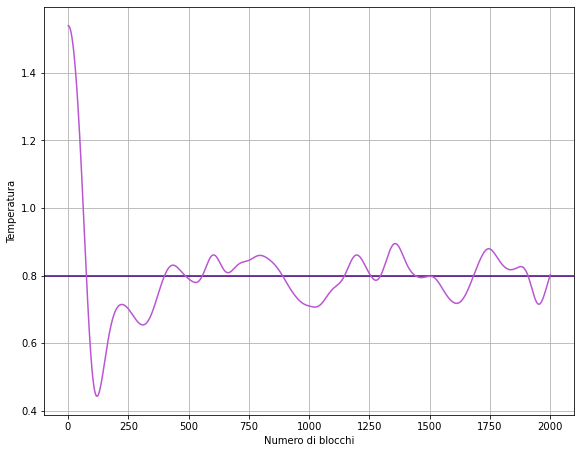

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4SOLID/output_temp_termalization') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.axhline(0.8, color='indigo') # horizontal
plt.ylabel('Temperatura')
plt.grid(True)
plt.show()

Sono in seguito riportati i grafici dei dati ottenuti durante le $M = 100000$ simulazioni. Si nota che la temperatura $T$ oscilla intorno al valore di equilibrio raggiunto durante la termalizzazione e risulta compatibile entro $3$ deviazioni standard con la $T^*$ desiderata.

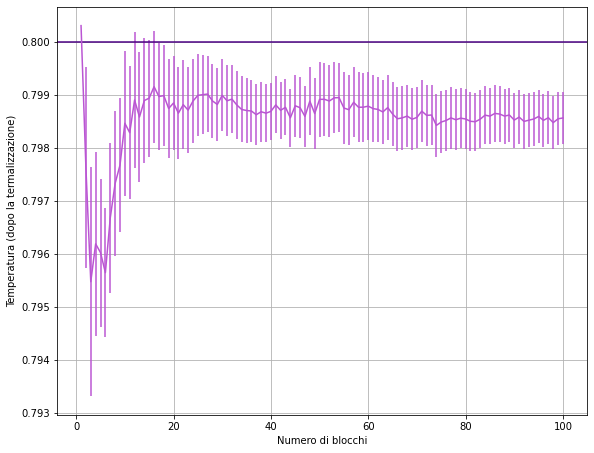

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4SOLID/output_temp') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Temperatura (dopo la termalizzazione)')
plt.axhline(0.8, color='indigo') # horizontal
plt.grid(True)
plt.show()

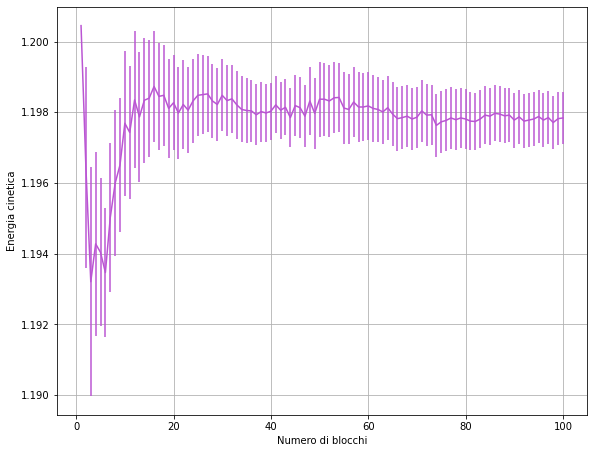

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4SOLID/output_ekin') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia cinetica')
plt.grid(True)
plt.show()

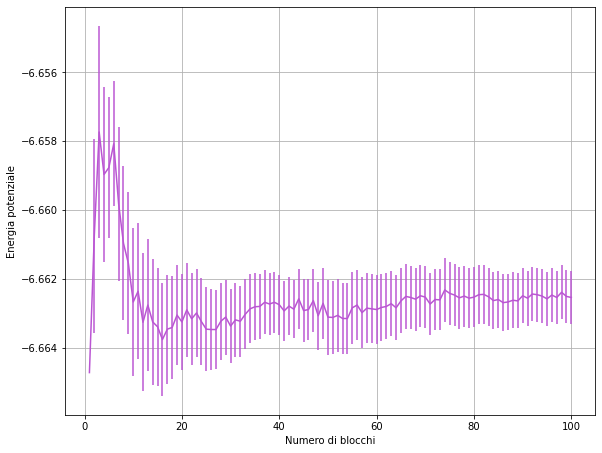

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4SOLID/output_epot') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia potenziale')
plt.grid(True)
plt.show()

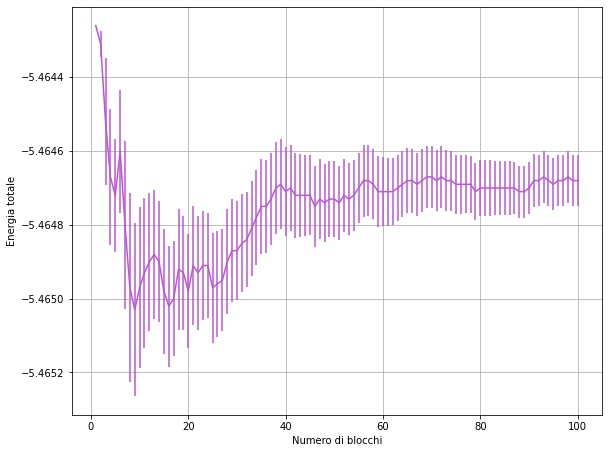

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4SOLID/output_etot') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia totale')
plt.grid(True)
plt.show()

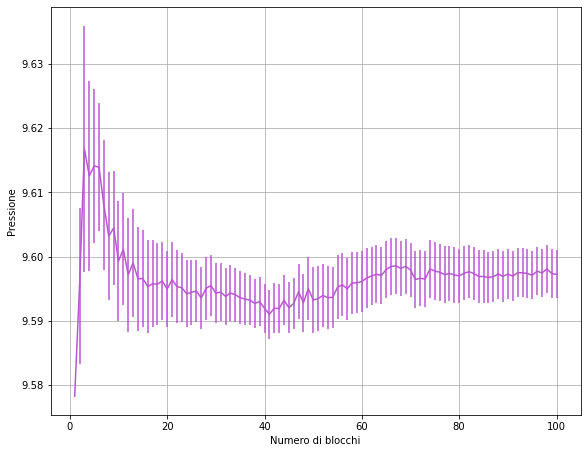

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4SOLID/output_press') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Pressione')
plt.grid(True)
plt.show()

#### Liquido

Si è termalizzato il sistema in modo del tutto analogo a quanto fatto per il solido.

Si nota che la temperatura si stabilizza, anche per il liquido, intorno alla $500$-esima iterazione.

Eseguendo più volte la termalizzazione si è ricavato che la temperatura da cui conviene partire per stabilizzarsi intorno a quella desiderata (ossia $T^* = 1.1$) è $T = 1.98$. 


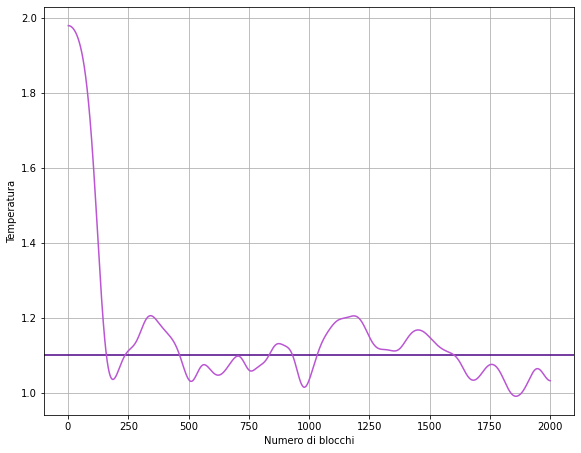

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4LIQUID/output_temp_termalization') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.axhline(1.1, color='indigo') # horizontal
plt.ylabel('Temperatura')
plt.grid(True)
plt.show()

Sono in seguito riportati i grafici dei dati ottenuti durante le $M = 100000$ simulazioni. Si nota che la temperatura $T$ oscilla intorno al valore di equilibrio raggiunto durante la termalizzazione e risulta compatibile entro $2$ deviazioni standard con la $T^*$ desiderata.

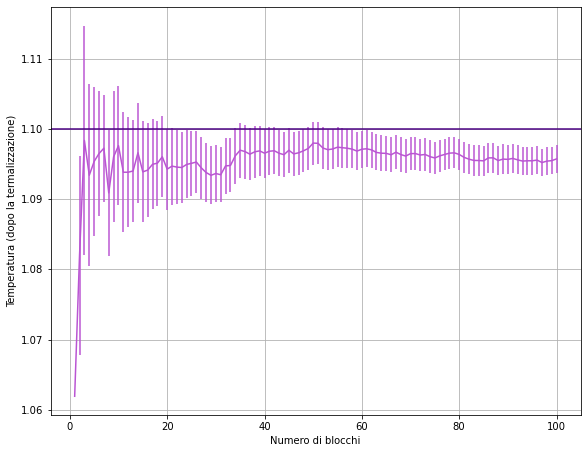

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4LIQUID/output_temp') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Temperatura (dopo la termalizzazione)')
plt.axhline(1.1, color='indigo') # horizontal
plt.grid(True)
plt.show()

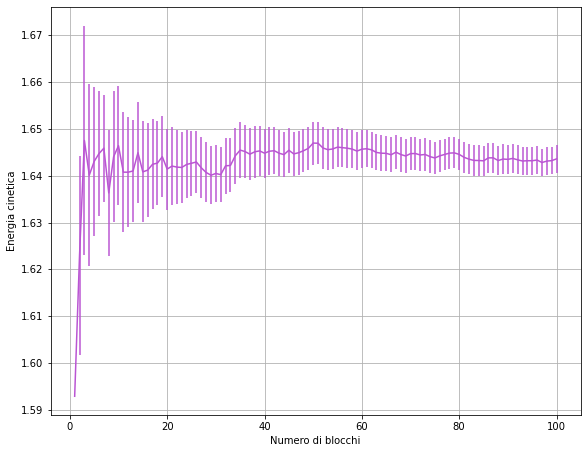

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4LIQUID/output_ekin') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia cinetica')
plt.grid(True)
plt.show()

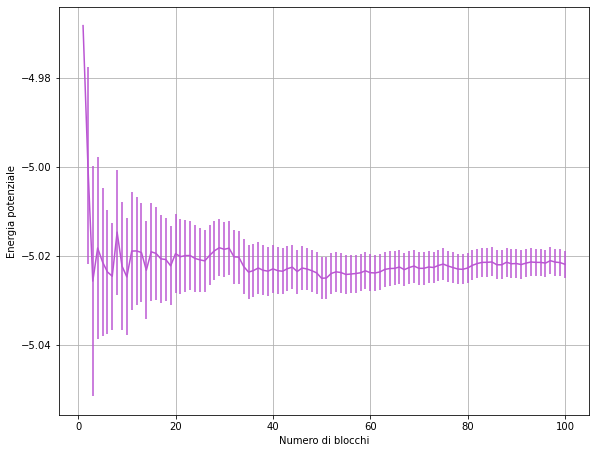

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4LIQUID/output_epot') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia potenziale')
plt.grid(True)
plt.show()

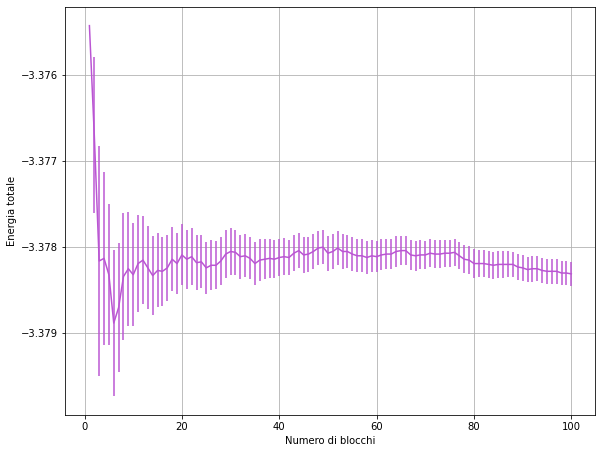

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4LIQUID/output_etot') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia totale')
plt.grid(True)
plt.show()

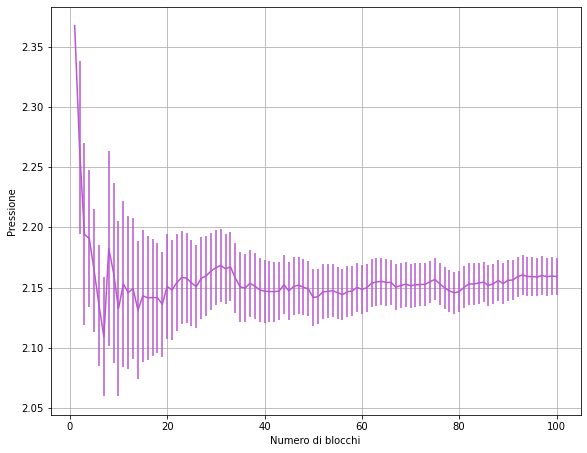

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4LIQUID/output_press') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Pressione')
plt.grid(True)
plt.show()

#### Gas

Come per solido e liquido, si è eseguita una termalizzazione preliminare del sistema.

Per la fase gassosa il raggiungimento dell'equilibrio risulta molto più lento rispetto a quanto accade per le altre due fasi: il sistema inizia infatti a stabilizzarsi intorno alla $5000$-esima iterazione. La temperatura, inoltre, invece che abbassarsi, si alza: ciò è dovuto al fatto che l'energia cinetica deve rapidamente aumentare per compensare la diminuzione di energia potenziale, causata dall'avvicinarsi del sistema a una configurazione più stabile rispetto a quella di partenza.

Eseguendo più volte la termalizzazione si è ricavato che la temperatura da cui conviene partire per stabilizzarsi intorno a quella desiderata (ossia $T^* = 1.2$) è $T = 0.95$. 

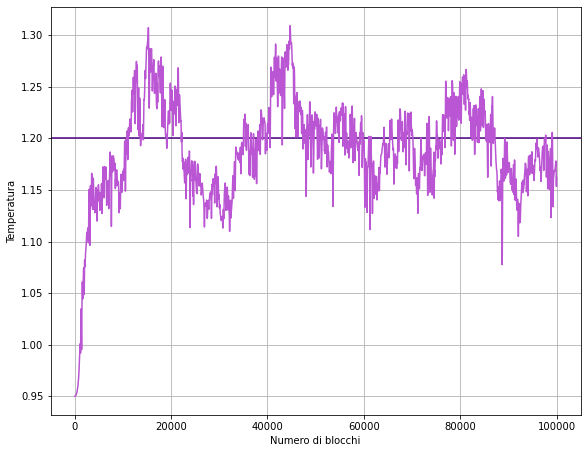

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4GAS/output_temp_termalization') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.axhline(1.2, color='indigo') # horizontal
plt.ylabel('Temperatura')
plt.grid(True)
plt.show()

Sono in seguito riportati i grafici dei dati ottenuti durante le $M = 100000$ simulazioni. Si nota che la temperatura $T$ oscilla intorno al valore di equilibrio raggiunto durante la termalizzazione e risulta compatibile entro $1$ deviazioni standard con la $T^*$ desiderata.

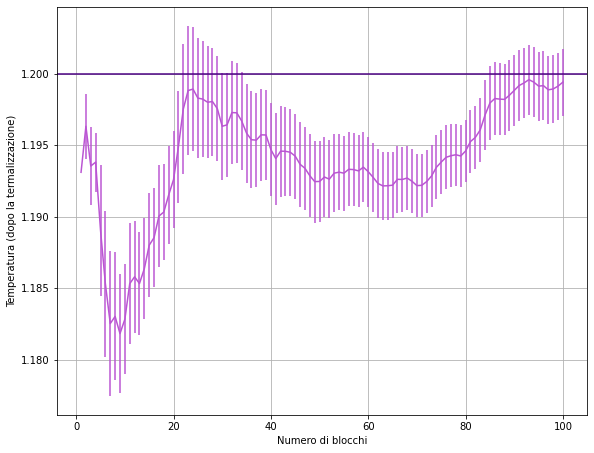

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4GAS/output_temp') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Temperatura (dopo la termalizzazione)')
plt.axhline(1.2, color='indigo') # horizontal
plt.grid(True)
plt.show()

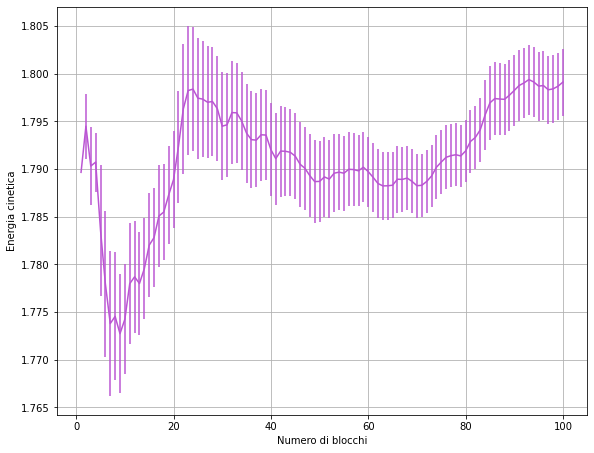

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4GAS/output_ekin') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia cinetica')
plt.grid(True)
plt.show()

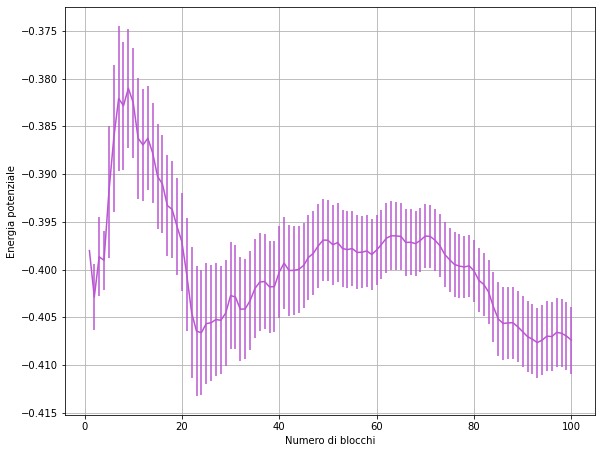

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4GAS/output_epot') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia potenziale')
plt.grid(True)
plt.show()

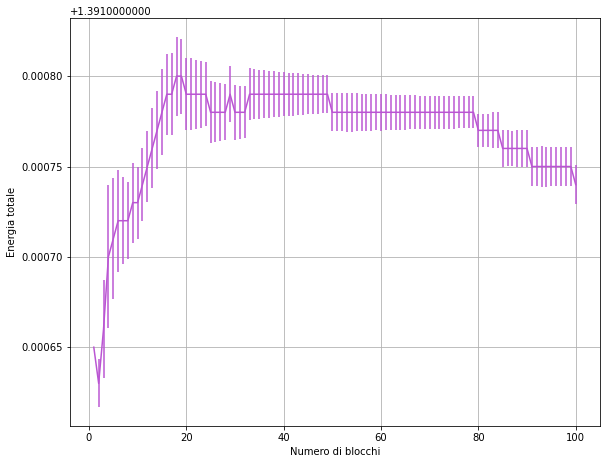

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4GAS/output_etot') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia totale')
plt.grid(True)
plt.show()

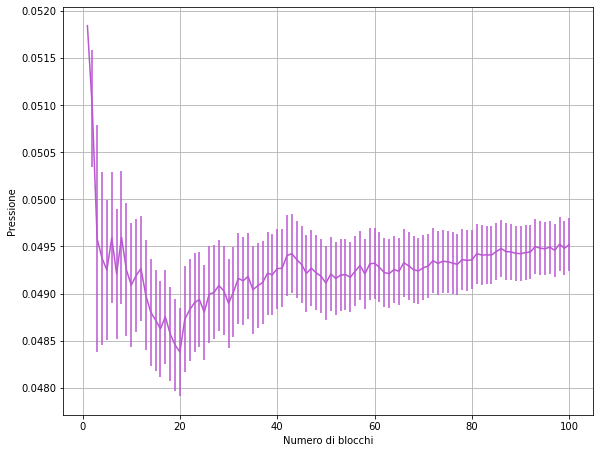

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es4/Es4GAS/output_press') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Pressione')
plt.grid(True)
plt.show()